# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | buckie
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | mitsamiouli
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | waddan
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | akureyri
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | mundri
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | vorkuta
Processing Record 21 of Set 1 | aras-asan
Processing Recor

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,9.62,91,96,1.88,NZ,1713243952
1,buckie,57.6757,-2.9624,6.14,85,96,10.21,GB,1713243952
2,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,94,75,4.00,RU,1713243816
3,ushuaia,-54.8000,-68.3000,7.60,91,66,1.34,AR,1713243800
4,mitsamiouli,-11.3847,43.2844,28.29,76,100,2.42,KM,1713243953


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,9.62,91,96,1.88,NZ,1713243952
1,buckie,57.6757,-2.9624,6.14,85,96,10.21,GB,1713243952
2,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,94,75,4.00,RU,1713243816
3,ushuaia,-54.8000,-68.3000,7.60,91,66,1.34,AR,1713243800
4,mitsamiouli,-11.3847,43.2844,28.29,76,100,2.42,KM,1713243953


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

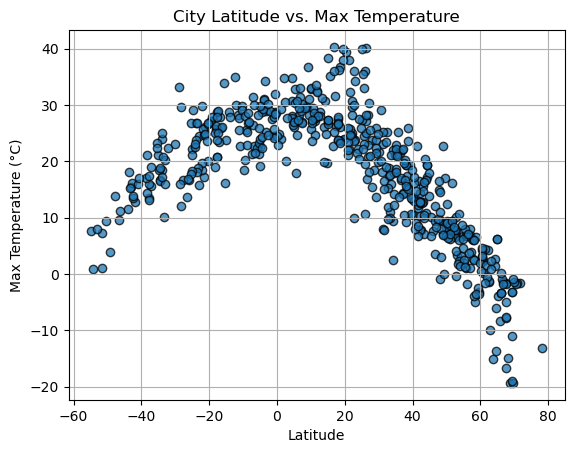

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

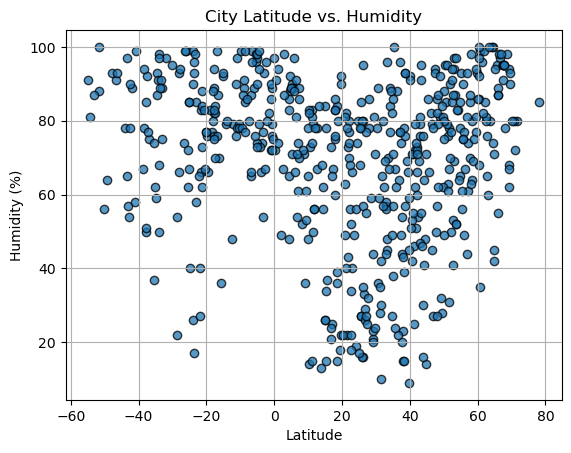

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

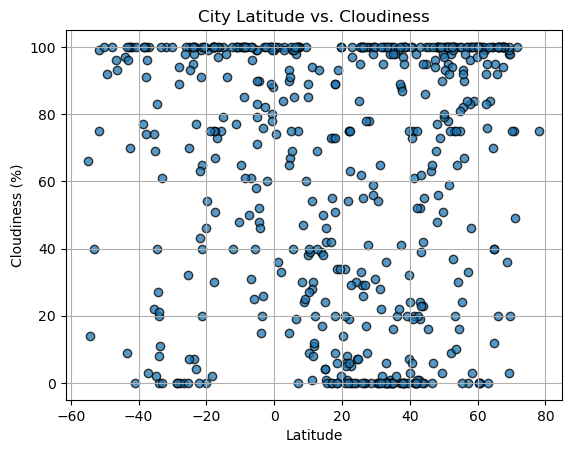

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

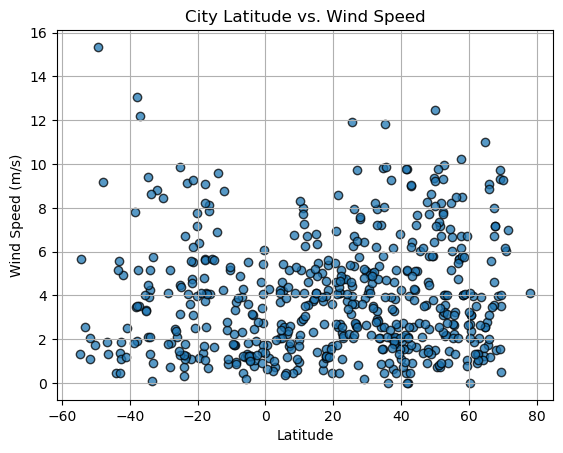

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    """
    Perform a linear regression on the x and y values.
    
    Args:
        x_values (Series): The x-axis values.
        y_values (Series): The y-axis values.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        text_coordinates (tuple): Tuple containing the coordinates for the annotation text.
    """
    # Performing linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculating the regression line
    regress_values = x_values * slope + intercept
    
    # Create equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # scatter plot 
    plt.scatter(x_values, y_values)
    
    # Plotting the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotating text
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # plotting labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Printing r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Showing plot
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,buckie,57.6757,-2.9624,6.14,85,96,10.21,GB,1713243952
2,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,94,75,4.00,RU,1713243816
5,tiksi,71.6872,128.8694,-1.64,80,100,6.98,RU,1713243953
6,waddan,29.1614,16.1390,26.00,21,59,6.43,LY,1713243954
7,bethel,41.3712,-73.4140,13.17,46,20,0.45,US,1713243954


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,9.62,91,96,1.88,NZ,1713243952
3,ushuaia,-54.8000,-68.3000,7.60,91,66,1.34,AR,1713243800
4,mitsamiouli,-11.3847,43.2844,28.29,76,100,2.42,KM,1713243953
8,adamstown,-25.0660,-130.1015,22.20,67,70,9.85,PN,1713243955
10,puerto ayora,-0.7393,-90.3518,24.45,89,80,2.74,EC,1713243955


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7930422622930358


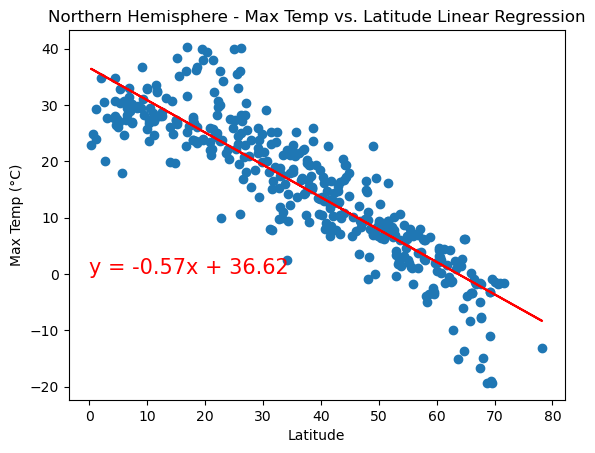

In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], 
                       'Latitude', 'Max Temp (°C)', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', (0, 0))

The r-squared is: 0.585174683198599


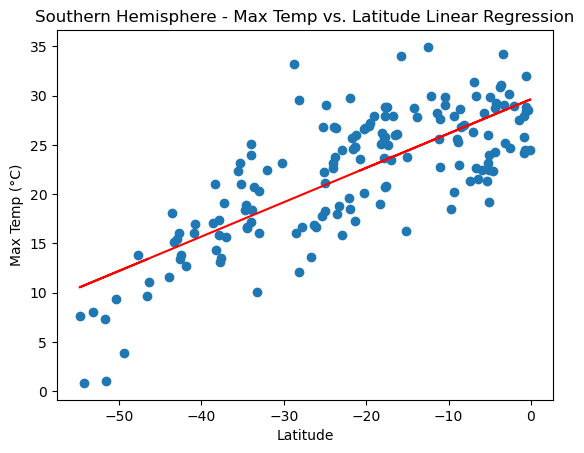

In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 
                       'Latitude', 'Max Temp (°C)', 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', (-30, 40))

**Discussion about the linear relationship:** 
Latitude and maximum temperature have a definite linear relationship in both the Northern and Southern Hemispheres. The temperature in the Northern Hemisphere clearly decreases and the temperature in the Southern Hemisphere noticeably climbs as latitude increases (going away from the equator). This link is consistent with the predicted temperature fluctuations caused by the axial tilt of the Earth and the sunlight's angle of incidence.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06217439808615865


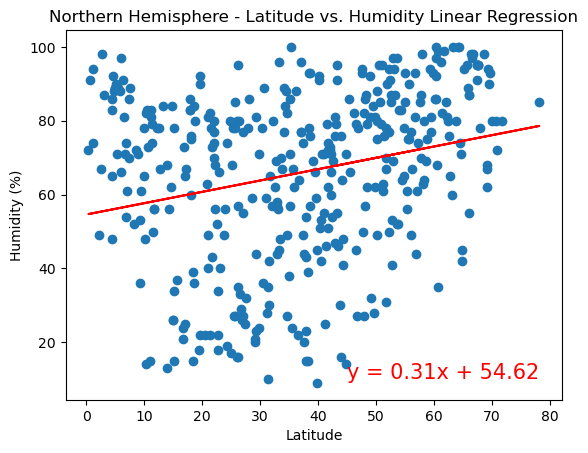

In [29]:
# Northern Hemisphere
# Northern Hemisphere - Latitude vs. Humidity
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], 
                       'Latitude', 'Humidity (%)', 'Northern Hemisphere - Latitude vs. Humidity Linear Regression', (45, 10))


The r-squared is: 0.009512672542680524


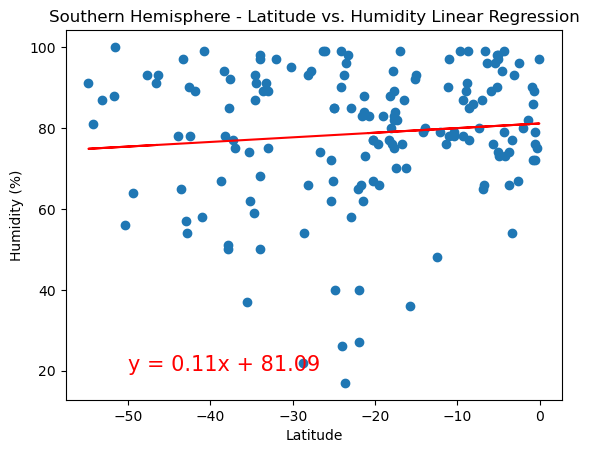

In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], 
                       'Latitude', 'Humidity (%)', 'Southern Hemisphere - Latitude vs. Humidity Linear Regression', (-50, 20))

**Discussion about the linear relationship:** 
Latitude and humidity do not appear to have a significant relationship, according to the linear regression study. The data points are dispersed throughout both hemispheres and lack a distinct linear pattern. Given that humidity levels are impacted by a variety of local and regional factors, including proximity to bodies of water, prevailing winds, and atmospheric conditions, it is possible that latitude alone is not a significant predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0572736112370549


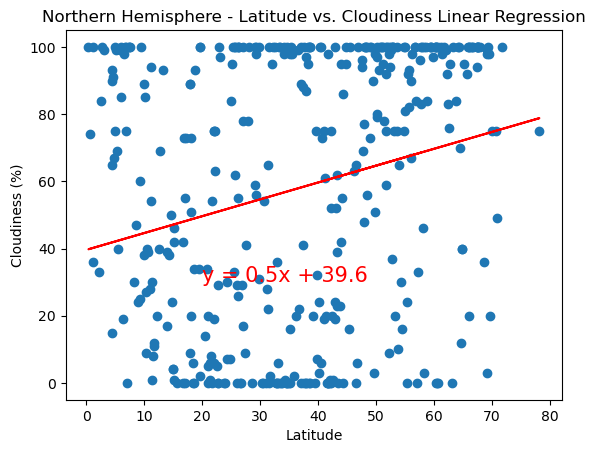

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], 
                       'Latitude', 'Cloudiness (%)', 'Northern Hemisphere - Latitude vs. Cloudiness Linear Regression', (20, 30))

The r-squared is: 0.017076093639796234


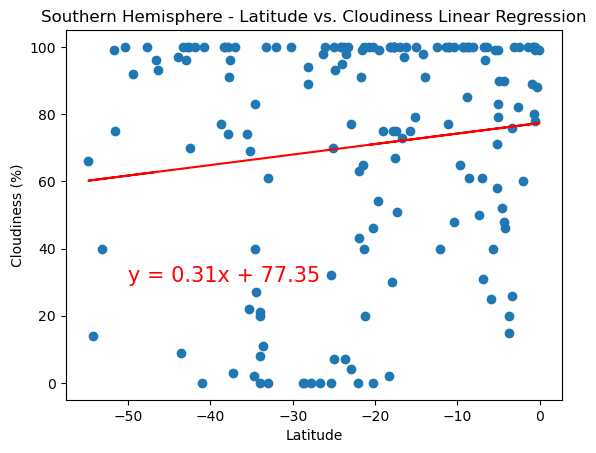

In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], 
                       'Latitude', 'Cloudiness (%)', 'Southern Hemisphere - Latitude vs. Cloudiness Linear Regression', (-50, 30))

**Discussion about the linear relationship:** 
As with humidity, there isn't a clear correlation in either hemisphere between latitude and cloudiness. Given the large dispersion of the data points, latitude might not be a good predictor of cloud cover. Independent of latitude, variables like air temperature, moisture content, and atmospheric stability affect cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.019923931200093753


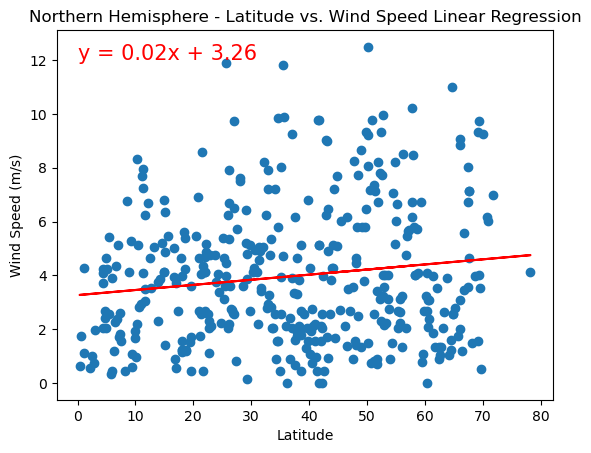

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], 
                       'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere - Latitude vs. Wind Speed Linear Regression', (0, 12))

The r-squared is: 0.03042881051578513


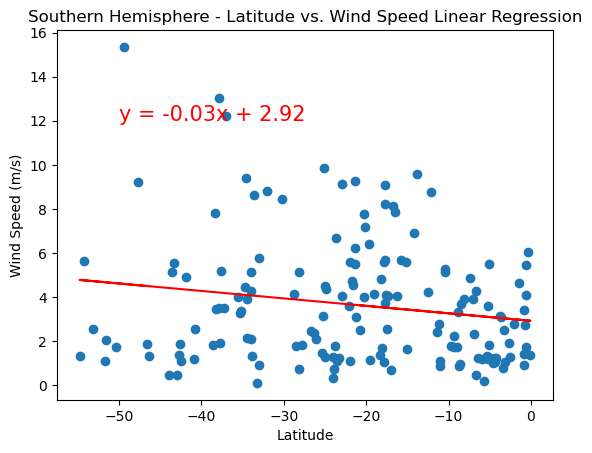

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], 
                       'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere - Latitude vs. Wind Speed Linear Regression', (-50, 12))

**Discussion about the linear relationship:**
There is no consistent linear trend found in either hemisphere according to the linear regression analysis of wind speed versus latitude. Among other things, the topography of the area, pressure gradients, and closeness to bodies of water all influence wind speed. Predominant wind patterns can exist at some latitudes, but they can be very variable and impacted by regional factors.
In conclusion, latitude affects maximum temperature trends significantly, but it appears to have less of an impact on other weather factors like humidity, cloud cover, and wind speed. Comprehending the intricate interaction among diverse meteorological elements outside latitude is imperative for precise weather forecasting and a There is no consistent linear trend found in either hemisphere according to the linear regression analysis of wind speed versus latitude. asion for